# Comparing PageRank Implementations

The aim of this notebook is to compare basic implementations of Personalised PageRank, building up to FAST-PPR. The imported datasets are described in the project report. After implementing an iterative method, random walks are then used to calculate the PageRank score. 

## Read in Libraries

In [1]:
import os
from tqdm import tqdm
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

In [3]:
import math
import warnings
warnings.filterwarnings('ignore')

# Read in the datasets
The following datasets will be read in:
1. Any beats dataset
2. EVA dataset
3. Roget dataset

Two random graphs are also created

###### Any beats dataset

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

myFile = np.genfromtxt('anybeatAnonymized.csv', delimiter=',')

# Create empty graph
G_AB = nx.DiGraph()

# Add edges to the graph (one by one :( ))
for i in range(myFile.shape[0]):
    G_AB.add_edges_from([(myFile[i,0],myFile[i,1])])
    
# Number of Nodes
n = G_AB.number_of_nodes() 

# Adjacency matrix 
A = nx.adj_matrix(G_AB)

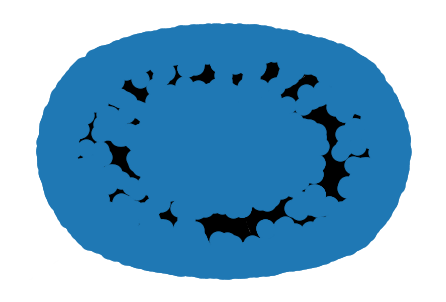

In [5]:
# Draw the network, just to make sure there were no issues!
nx.draw(G_AB)

In [6]:
G = G_AB

###### EVA dataset

In [7]:
myFile = np.genfromtxt('eva.csv', delimiter=',')

# Create empty graph
G_Eva = nx.DiGraph()

# Add edges to the graph (one by one :( ))
for i in range(myFile.shape[0]):
    for j in range(1,myFile.shape[1]):
        if not math.isnan(myFile[i,j]):
            G_Eva.add_edges_from([(myFile[i,0],myFile[i,j])])
            #print("added",(myFile[i,0],myFile[i,j]))

#G.add_edges_from([(1,2)])

# Number of Nodes
n = G_Eva.number_of_nodes() 
print(n)

# Adjacency matrix 
A = nx.adj_matrix(G_Eva)
A = A.todense()
A = np.array(A, dtype = np.float64)

#print(A)

7253


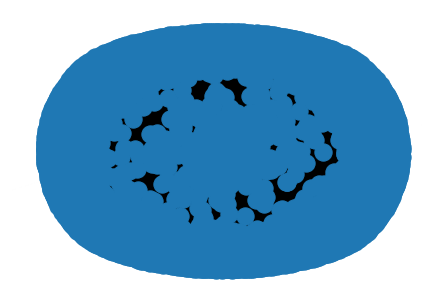

In [8]:
# Draw the network, just to make sure there were no issues!
nx.draw(G_Eva)

In [9]:
G = G_Eva

###### Roget dataset

In [10]:
myFile = np.genfromtxt('Roget.csv', delimiter=',')

# Create empty graph
G_R = nx.DiGraph()

# Add edges to the graph (one by one :( ))
for i in range(myFile.shape[0]):
    for j in range(1,myFile.shape[1]):
        if not math.isnan(myFile[i,j]):
            G_R.add_edges_from([(myFile[i,0],myFile[i,j])])
            #print("added",(myFile[i,0],myFile[i,j]))

#G.add_edges_from([(1,2)])

# Number of Nodes
n = G_R.number_of_nodes() 
#print(n)

# Adjacency matrix 
A = nx.adj_matrix(G_R)
A = A.todense()
A = np.array(A, dtype = np.float64)

#print(A)

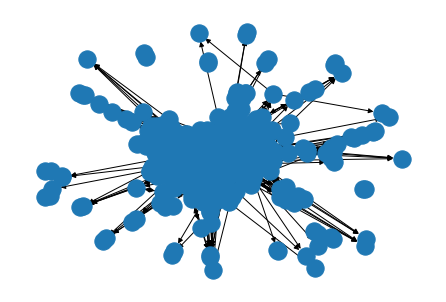

In [11]:
# Draw the network, just to make sure there were no issues!
nx.draw(G_R)

In [12]:
G = G_R

# Create Toy Networks

In [13]:
# Generate a Random Graph G(nodes, prob of edge) (undirected)
G = nx.gnp_random_graph(10000, 0.4) 

# Generate a small directed graph -- just to make sure the code runs without errors!
#G = nx.scale_free_graph(10)

In [15]:
G_large = nx.gnp_random_graph(500000, 0.4) 

MemoryError: 

In [ ]:
A_large = nx.adj_matrix(G_large)
nAT_large = Normalise_Sparse(G_large)
p_large, residuals_large = Iterative_Sparse(G = G_large, nAT = nAT_large, b = 0.2, epsilon = 0.0000001, Max_iter = 200, s = 1)

# Iterative Method
1. Generate a (directed) graph
2. Perform the row-normalization of the given adjacency matrix
    - check each row sums to 1
3. Iterate the PageRank
4. Validate the implementation
    - Do the residuals go to zero?
    - Do we get the same value as the Networkx library?


Notes:
1. Dense matrices have been changed to sparse (will be running on very large networks later)
2. The Iterative algorithm below is for PageRank - Should be changed to Personalised PageRank

In [ ]:
def Normalise_Sparse(G):
    # Get number of nodes (Useful later when just reading in unknown graphs?)
    n = G.number_of_nodes() 
    
    # Adjacency matrix 
    A = nx.adj_matrix(G)
    
    # Out-Degree Vector
    D = A.sum(axis = 1)  # row-wise summation of A
    D = np.asarray(D).flatten() # A is a csr_matrix so we need to make it vector
    
    # Get inverse of Out-Degree Matrix (edited the following lines from online)
    d = np.maximum(D, np.ones(n))
    inv_d = 1.0 / d                # entry-wise division
    inv_D = spdiags(inv_d,0,n,n) # Create SPARSE diagonal matrix from data #spdiags( Data, diagonal shift, shape1, shape2)
    
    # Get the row-normalised adjacency matrix
    nA = inv_D.dot(A)   # nA = invD * A
    nAT = nA.T         # nAT is the transpose of nA
    
    return(nAT)

In [ ]:
def Print_Row_Summation_Sparse(nAT,G):
    n = G.number_of_nodes() 
    
    # Check the rows of nAT sum to one ( I don't trust the online code)
    row_sums = nAT.sum(axis = 1)
    
    # Convert to an array and flatten ( so behaves the same as the dense matrix version )
    row_sums = np.asarray(row_sums).flatten()
    
    for i in range(n):
        print("node ", i, " row_sum: ",row_sums[i])
        
    return ()

In [ ]:
def Iterative_Sparse(G, nAT,b, epsilon, Max_iter,s):
    n = G.number_of_nodes() 
    
    q = np.zeros(n)
    q[s] = 1 # Teleport will always bring us to s (I think this makes it "Personalised")
    
    #q = np.ones(n)/n     # set the query vector q (So NOT Personalised)
    old_p = np.ones(n)/n            # Initial guess: all have rank 1/n
    residuals = []       # set the list for residuals over iterations
    
    for t in range(Max_iter):
        p = (1 - b) * (nAT.dot(old_p)) + (b * q)
        residual = np.linalg.norm(p - old_p, 1)
        residuals.append(residual)
        old_p = p
        
        if residual < epsilon:
            break # Or continue?
        
    return(p,residuals)

In [ ]:
b = 0.2 # Teleport Probability
epsilon = 0.01 # Error Tolerance
Max_iter = 20 # Maximum number of iterations
s = 1

A = nx.adj_matrix(G)
nAT = Normalise_Sparse(G)
#Print_Row_Summation_Sparse(nAT,G)
p, residuals = Iterative_Sparse(G = G, nAT = nAT,b = 0.2, epsilon = 0.0000001, Max_iter = 200, s = 1)

In [18]:
A_AB = nx.adj_matrix(G_AB)
A_Eva = nx.adj_matrix(G_Eva)
A_R = nx.adj_matrix(G_R)

In [19]:
nAT_AB = Normalise_Sparse(G_AB)
nAT_Eva = Normalise_Sparse(G_Eva)
nAT_R = Normalise_Sparse(G_R)

In [23]:
p_AB, residuals_AB = Iterative_Sparse(G = G_AB, nAT = nAT_AB, b = 0.2, epsilon = 0.0000001, Max_iter = 200, s = 1)
p_Eva, residuals_Eva = Iterative_Sparse(G = G_Eva, nAT = nAT_Eva, b = 0.2, epsilon = 0.0000001, Max_iter = 200, s = 1)
p_R, residuals_R = Iterative_Sparse(G = G_R, nAT = nAT_R, b = 0.2, epsilon = 0.0000001, Max_iter = 200, s = 1)

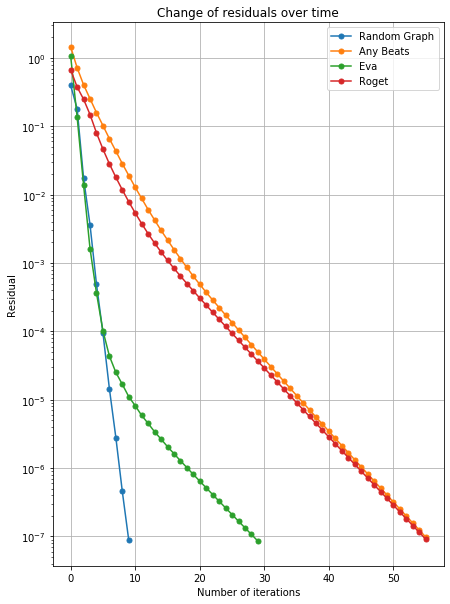

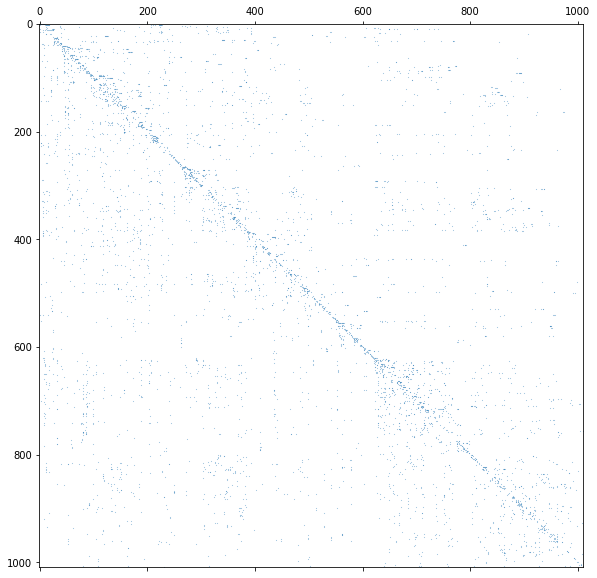

In [112]:
# 1. Does error always decrease?
#plt.figure(figsize=(7,10)) 
plt.semilogy(residuals, marker='o', markersize=5, label = "Random Graph")
plt.semilogy(residuals_AB, marker='o', markersize=5, label = "Any Beats")
plt.semilogy(residuals_Eva, marker='o', markersize=5, label = "Eva")
plt.semilogy(residuals_R, marker='o', markersize=5, label = "Roget")
#plt.semilogy(residuals_large, marker='o', markersize=5, label = "Roget")
plt.title("Change of residuals over time")
plt.ylabel('Residual')
plt.xlabel('Number of iterations')
plt.grid(True)
plt.legend()
plt.savefig("ConvergenceTimes3")
plt.show()

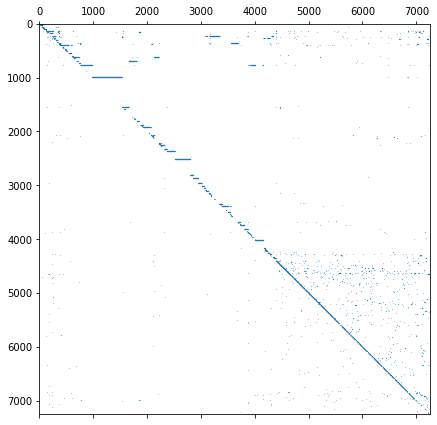

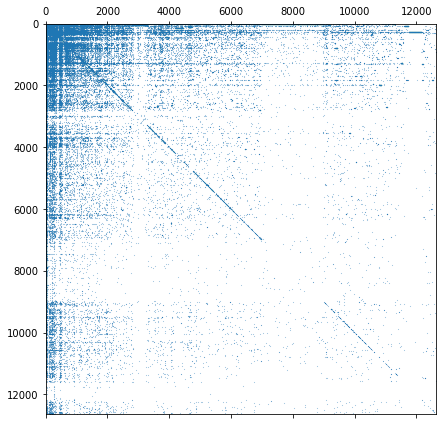

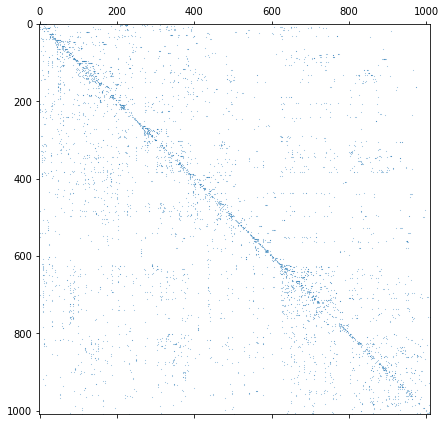

In [111]:
# 2. Visualise the density/sparsity of the network
plt.figure(figsize=(10,10))      # resize the figure to be presented
plt.spy(A, markersize=0.1)   # sparsity pattern of the matrix 
plt.show()

plt.figure(figsize=(10,10))      # resize the figure to be presented
plt.spy(A_Eva, markersize=0.1)   # sparsity pattern of the matrix 
plt.savefig("EvaAdjacencyMatrix")
plt.show()

plt.figure(figsize=(10,10))      # resize the figure to be presented
plt.spy(A_AB, markersize=0.1)   # sparsity pattern of the matrix 
plt.savefig("ABAdjacencyMatrix")
plt.show()

plt.figure(figsize=(10,10))      # resize the figure to be presented
plt.spy(A_R, markersize=0.1)   # sparsity pattern of the matrix 
plt.savefig("ARAdjacencyMatrix")
plt.show()

# Personalised PR using Random Walks
Use the same network G as above.

1. Set the start node s, target t, number of walks W, teleport prob alpha
2. Count either the number of walks that finish at t and divide by the total number of walks
    or count the number of times we reached t and divide by ? (the total number of steps?)

In [ ]:
# Using Sparse Matrices

In [28]:
def RW_Sparse(G,Walks,alpha,s,t):
    
    # Adjacency matrix 
    A = nx.adj_matrix(G)
    
    # Get number of nodes
    n = G.number_of_nodes() 
    
    # Out-Degree Vector
    D = A.sum(axis = 1)  # row-wise summation of A
    D = np.asarray(D).flatten() # A is a csr_matrix so we need to make it vector
    
    # Get inverse of Out-Degree Matrix (edited the following 3 lines from online)
    d = np.maximum(D, np.ones(n))
    inv_d = 1.0 / d                # entry-wise division
    inv_D = spdiags(inv_d,0,n,n) # Create SPARSE diagonal matrix from data #spdiags( Data, diagonal shift, shape1, shape2)
    
    
    # Get the row-normalised adjacency matrix
    T = inv_D.dot(A)   # T = invD * A -- the transition matrix!
    
    # Count how many times we finish at t?
    t_count = 0

    
    for walk in range(Walks):
        
        
        # Define the length of the walk
        Li = np.random.geometric(p = alpha)

        location = s
        
        for step in range(Li):
            #print("Taking step", step)
            
            # Get the transition probabilities (Row of T)
            probs = T[location,:] # Sparse matrix with shape (1,n), location s at probs[0,s]
            
            # Generate a r.v X between 0 and 1
            X = np.random.uniform(0,1,2)
            
            
            # if X < alpha: Return to s, else choose somewhere else from probs
            if X[0] < alpha:
                #print("Returned")
                continue
            
            New_location = 0
            while(X[1] >= 0 and New_location < n-1):
                X[1] -= probs[0,New_location]
                New_location += 1
            
            location = New_location

        if location == t:
            t_count += 1
            #print("Ended at t")
            
    return(t_count/Walks)
    

In [30]:
s = 1
t = 25
Walks = 100
alpha = 0.2
#print("PPR  pi(s,t) = ",RW_Sparse(G,Walks,alpha,s,t))

In [32]:
# Graph with 500k nodes?
G_large = nx.gnp_random_graph(500, 0.4) 

import time
Num_Walks = []
N_iterations = 30
RW_estimates = np.zeros((50,N_iterations))
RW_times = np.zeros((50,N_iterations))

for i in range(1,50):
    Num_Walks.append(100*i)
    
ii = 0
for Walks in tqdm(Num_Walks):
    
    for it in range(N_iterations):
        start = time.time()
        pi = RW_Sparse(G_large,Walks,alpha,s,t)
        end = time.time()
        
        print(pi)
        RW_estimates[ii, it] = pi
        RW_times[ii,it] = end - start
    
    ii += 1

  0%|                                                                                           | 0/49 [00:00<?, ?it/s]

0.0
0.0
0.02
0.0
0.0
0.0
0.0
0.01
0.0
0.0
0.01
0.0
0.0
0.01
0.0
0.0
0.0
0.0
0.0
0.01
0.0
0.01
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


  2%|█▋                                                                               | 1/49 [01:25<1:08:31, 85.66s/it]

0.0
0.0
0.0
0.005
0.005
0.0
0.005
0.0
0.005
0.0
0.0
0.0
0.0
0.0
0.0
0.005
0.0
0.0
0.005
0.015
0.0
0.01
0.005
0.005
0.0
0.005
0.0
0.005
0.0
0.005


  4%|███▎                                                                            | 2/49 [08:41<2:29:27, 190.80s/it]

0.0
0.0033333333333333335
0.01
0.0033333333333333335
0.0
0.0
0.0
0.0
0.0033333333333333335
0.006666666666666667
0.0033333333333333335
0.0
0.0033333333333333335
0.006666666666666667
0.0
0.0033333333333333335
0.0033333333333333335
0.0
0.0
0.0
0.006666666666666667
0.0
0.0
0.0
0.0
0.0033333333333333335
0.0033333333333333335
0.0033333333333333335
0.006666666666666667
0.0


  6%|████▉                                                                           | 3/49 [12:54<2:40:32, 209.40s/it]

0.0025
0.0025
0.005
0.0
0.0
0.0025
0.0
0.0
0.0
0.005
0.0
0.005
0.0025
0.0
0.0025
0.0025
0.0025
0.0075
0.005
0.0
0.0
0.0025
0.0025
0.0
0.0025
0.0025
0.0075
0.0025
0.0025
0.0


  8%|██████▌                                                                         | 4/49 [18:38<3:07:25, 249.90s/it]

0.004
0.006
0.004
0.002
0.0
0.0
0.002
0.0
0.0
0.004
0.008
0.004
0.004
0.0
0.002
0.002
0.004
0.002
0.006
0.0
0.002
0.006
0.0
0.002
0.0
0.006
0.002
0.002
0.0
0.002


 10%|████████▏                                                                       | 5/49 [32:41<5:13:38, 427.68s/it]

0.0
0.0033333333333333335
0.0
0.0
0.005
0.0
0.0033333333333333335
0.005
0.0016666666666666668
0.005
0.0016666666666666668
0.0016666666666666668
0.0016666666666666668
0.0
0.0
0.0016666666666666668
0.0
0.0
0.0016666666666666668
0.0033333333333333335
0.0033333333333333335
0.008333333333333333
0.0
0.0016666666666666668
0.005
0.0033333333333333335
0.005
0.0
0.006666666666666667
0.0033333333333333335


 12%|█████████▊                                                                      | 6/49 [52:21<7:48:18, 653.44s/it]

0.005714285714285714
0.0014285714285714286
0.0014285714285714286
0.0
0.0014285714285714286
0.002857142857142857


KeyboardInterrupt: 

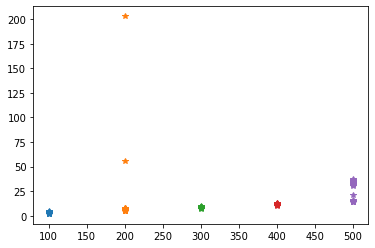

In [68]:
for i in range(1,6):
    plt.plot(np.repeat(100*i,30),RW_times[i - 1,:], "*")
plt.show()

In [91]:
np.std(RW_estimates[0 - 1,:] - p_large[25])

4.336808689942018e-19

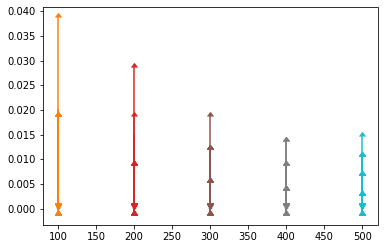

In [101]:

for i in range(1,6):
    plt.plot(np.repeat(100*i,1), np.mean(RW_estimates),".")
    #plt.errorbar(np.repeat(100*i,1), np.mean(RW_estimates[i - 1,:]), yerr=np.std(RW_estimates[i - 1,:] - p_large[25]), label='both limits (default)',  uplims=True, lolims=True)
    plt.errorbar(np.repeat(100*i,30), RW_estimates[i - 1,:], yerr=RW_estimates[i - 1,:] - p_large[25], label='both limits (default)',  uplims=True, lolims=True)
plt.show()

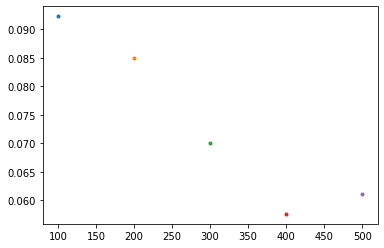

In [82]:
#np.abs(RW_estimates[2 - 1,:] - p_large[25]) 

#np.linalg.norm(RW_estimates[2 - 1,:] - p_large[25], 1)
for i in range(1,6):
    plt.plot(np.repeat(100*i,1),np.linalg.norm(RW_estimates[i - 1,:] - p_large[25], 1), ".")
plt.show()

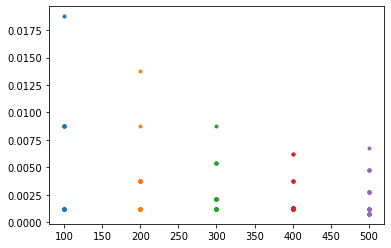

In [77]:
for i in range(1,6):
    plt.plot(np.repeat(100*i,30),np.abs(RW_estimates[i - 1,:] - p_large[25]), ".")
plt.show()

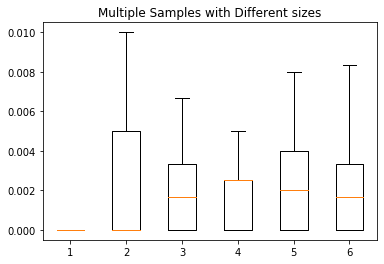

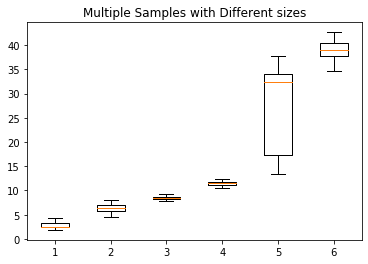

In [42]:
data = []

for i in range(6):
    data.append(list(RW_estimates[i]))


#data = [Times_RW, Times_Iter]
#data = [Pi_vals_RW, Pi_vals_Iter ]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data,showfliers=False)

plt.show()

data = []

for i in range(6):
    data.append(list(RW_times[i]))


#data = [Times_RW, Times_Iter]
#data = [Pi_vals_RW, Pi_vals_Iter ]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data,showfliers=False)

plt.show()

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame(RW_estimates[0:6].T, columns=['A', 'B', 'C', 'D', 'E'])
#df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box(grid='False')
plt.show()

In [19]:
# Compare Running Times: Run each 100 times? 
import time

N_iterations = 100

Times_RW = []
#Times_Iter = []

Pi_vals_RW = []
#Pi_vals_Iter = []

for it in tqdm(range(N_iterations)):

    start  = time.time()
    
    pi = RW_Sparse(G,Walks,alpha,s,t)
    
    end = time.time()
    
    Time_taken = end - start
    
    Times_RW.append(Time_taken)
    Pi_vals_RW.append(pi)
    
    #start  = time.time()
    #
    #p,residuals = Iterative_Sparse(b = 0.2, epsilon = 0.001, Max_iter = 50, s = 1)
    #
    #end = time.time()
    #
    #Time_taken = end - start
    #
    #Times_Iter.append(Time_taken)
    #Pi_vals_Iter.append(p[t])



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:56<00:00,  1.77it/s]


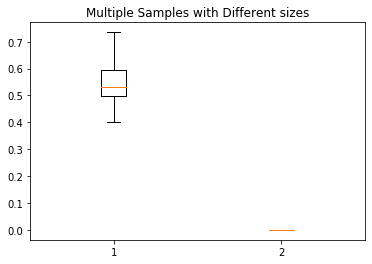

In [22]:
data = [Times_RW, Times_Iter]
#data = [Pi_vals_RW, Pi_vals_Iter ]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data,showfliers=False)

plt.show()